<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [0]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.2.4-tf


In [1]:
#FOR GITHUB SOLUTION
!git clone "https://github.com/OldManSteve/Testing.git"

Cloning into 'Testing'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10045 (delta 1), reused 4 (delta 1), pack-reused 10040
Receiving objects: 100% (10045/10045), 474.06 MiB | 34.89 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (10004/10004), done.


In [0]:
# Directories for your training, validation and test splits
train_dir = '/content/Testing/train'
validation_dir = '/content/Testing/validation'
test_dir = '/content/Testing/test'

## Step 1: Data Loading

In [0]:
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 

# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Assign the 10 types of food from your .txt file to a list variable 'food_list'
   
label_file = os.path.join(base_dir, '13.txt') 
# Refer to the report Appendix
# Please enter the name of .txt file which contains a list of food assigned to you
# Make sure you save the .txt file in your base_dir

with open(label_file, 'r') as f:
    x = f.readlines()
    
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
        
#copy the first 750 images to train folder
for item in food_list:
    train_food_dir = os.path.join(train_dir, item)
    os.mkdir(train_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[:750]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(train_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the following 200 images [750:950] to validation folder
for item in food_list:
    validation_food_dir = os.path.join(validation_dir, item)
    os.mkdir(validation_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[750:950]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(validation_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the remaining 50 images [950:1000] to test folder
for item in food_list:
    test_food_dir = os.path.join(test_dir, item)
    os.mkdir(test_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[950:1000]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(test_food_dir, fname)
        shutil.copyfile(src, dst)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\DL_Notebk\\train'

In [0]:
#run if folders already created
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 
# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Step 2:  Develop the Image Classification Models

### Model #2 (ResNet50 unfrozen) v1 

In [3]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base2 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'conv5_block1_1_conv': #try res5a 
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model2 = models.Sequential()
model2.add(conv_base2) #ResNet50 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [4]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 120s 159ms/step - loss: 2.2547 - acc: 0.1881 - val_loss: 2.2165 - val_acc: 0.2170
Epoch 2/30
750/750 [==============================] - 116s 154ms/step - loss: 2.1102 - acc: 0.2357 - val_loss: 1.9779 - val_acc: 0.2965
Epoch 3/30
750/750 [==============================] - 117s 156ms/step - loss: 2.0441 - acc: 0.2628 - val_loss: 1.8494 - val_acc: 0.3535
Epoch 4/30
750/750 [==============================] - 119s 158ms/step - loss: 2.0082 - acc: 0.2788 - val_loss: 1.8762 - val_acc: 0.3605
Epoch 5/30
750/750 [==============================] - 115s 154ms/step - loss: 1.9626 - acc: 0.2989 - val_loss: 1.7647 - val_acc: 0.3860
Epoch 6/30
750/750 [==============================] - 118s 158ms/step - loss: 1.9231 - acc: 0.3152 - val_loss: 2.1090 - val_acc: 0.2990
Epoch 7/30
750/750 [==

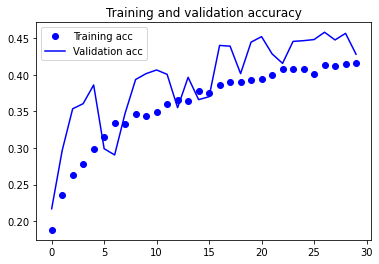

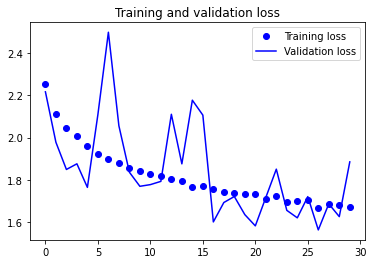

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.41200000047683716


In [5]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model2.save('food_model_2(ResNet50_unfrozen).h5')

In [7]:
#adding epochs
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 117s 156ms/step - loss: 1.6711 - acc: 0.4175 - val_loss: 1.8422 - val_acc: 0.4185
Epoch 2/30
750/750 [==============================] - 117s 157ms/step - loss: 1.6571 - acc: 0.4224 - val_loss: 1.8470 - val_acc: 0.4220
Epoch 3/30
750/750 [==============================] - 116s 155ms/step - loss: 1.6644 - acc: 0.4253 - val_loss: 1.6249 - val_acc: 0.4500
Epoch 4/30
750/750 [==============================] - 116s 155ms/step - loss: 1.6578 - acc: 0.4227 - val_loss: 1.6993 - val_acc: 0.4370
Epoch 5/30
750/750 [==============================] - 116s 155ms/step - loss: 1.6442 - acc: 0.4339 - val_loss: 1.7069 - val_acc: 0.4250
Epoch 6/30
750/750 [==============================] - 117s 156ms/step - loss: 1.6444 - acc: 0.4248 - val_loss: 1.8681 - val_acc: 0.4000
Epoch 7/30
750/750 [==============================] - 116s 155ms/step - loss: 1.6512 - acc: 0.4217 - val_loss: 1.7086 - val_acc: 0.4550
Epoch 8/30
750/750 [============================

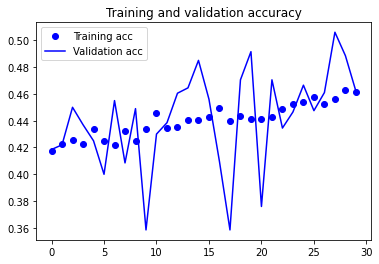

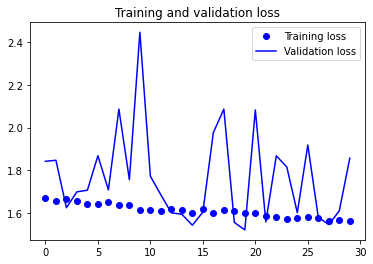

Found 500 images belonging to 10 classes.
test acc: 0.4620000123977661


In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model2.save('food_model_2(ResNet50_unfrozen)v1_1.h5')

In [11]:
#adding epochs
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/100
739/750 [============================>.] - ETA: 1s - loss: 1.5546 - acc: 0.4587

KeyboardInterrupt: ignored

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model2.save('food_model_2(ResNet50_unfrozen)v1_2.h5')

### ResNet50 unfrozen v2

In [0]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base2 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'conv5_block1_1_conv': #try res5a 
        set_trainable = True # after layer, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model2 = models.Sequential()
model2.add(conv_base2) #ResNet50 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model2.save('food_model_2(ResNet50_unfrozen)v1_2.h5')

### Model #1 (ResNet50 frozen)

In [0]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezeing (without fine tuning of layer freezing)
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base) #ResNet50 pre-train
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


conv_base.summary()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_22[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
750/750 [==============================] - 1008s 1s/step - loss: 1.5606 - acc: 0.5085 - val_loss: 2.1263 - val_acc: 0.4115
Epoch 2/30
750/750 [==============================] - 973s 1s/step - loss: 1.1945 - acc: 0.6333 - val_loss: 1.0267 - val_acc: 0.7030
Epoch 3/30
750/750 [==============================] - 971s 1s/step - loss: 1.0838 - acc: 0.6728 - val_loss: 1.0185 - val_acc: 0.7105
Epoch 4/30
750/750 [==============================] - 952s 1s/step - loss: 1.0257 - acc: 0.6901 - val_loss: 0.9884 - val_acc: 0.7285
Epoch 5/30
750/750 [==============================] - 983s 1s/step - loss: 0.9694 - acc: 0.7061 - val_loss: 0.9699 - val_acc: 0.7395
Epoch 6/30
750/750 [==============================] - 950s 1s/step - loss: 0.9358 - acc: 0.7185 - val_loss: 1.0141 - val_acc: 0.7295
Epoch 7/30
750/750 [==============================] - 948s 1s/step - loss: 0.9249 - acc: 0.7312 - val_loss: 1.1062 

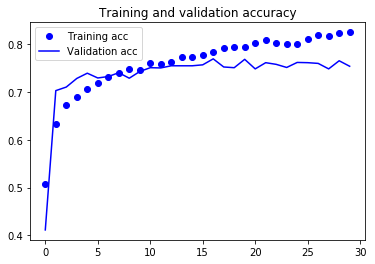

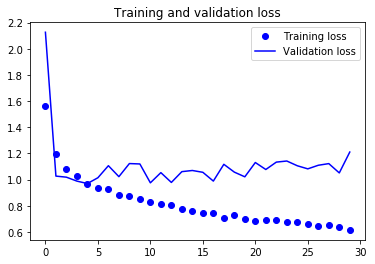

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Save the Model
model.save('food_model_1(ResNet50_frozen).h5')

### VGG19 frozen

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base3 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))


#freezeing (without fine tuning of layer freezing)
conv_base3.trainable = False

model3 = models.Sequential()
model3.add(conv_base3) #CGG19 pre-train
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))


conv_base3.summary()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history3 = model3.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
750/750 [==============================] - 1443s 2s/step - loss: 1.7820 - acc: 0.3855 - val_loss: 1.4342 - val_acc: 0.5180
Epoch 2/30
750/750 [==============================] - 1433s 2s/step - loss: 1.4362 - acc: 0.5120 - val_loss: 1.2719 - val_acc: 0.5750
Epoch 3/30
750/750 [==============================] - 1418s 2s/step - loss: 1.3220 - acc: 0.5397 - val_loss: 1.1871 - val_acc: 0.5995
Epoch 4/30
750/750 [==============================] - 1417s 2s/step - loss: 1.2758 - acc: 0.5569 - val_loss: 1.1413 - val_acc: 0.6070
Epoch 5/30
750/750 [==============================] - 1420s 2s/step - loss: 1.2165 - acc: 0.5821 - val_loss: 1.0873 - val_acc: 0.6255
Epoch 6/30
750/750 [==============================] - 1438s 2s/step - loss: 1.1814 - acc: 0.5959 - val_loss: 1.0742 - val_acc: 0.6310
Epoch 7/30
750/750 [==============================] - 1437s 2s/step - loss: 1.1655 - acc: 0.6035 - val_loss: 1

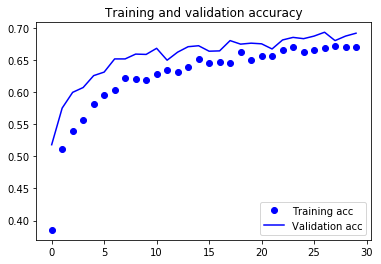

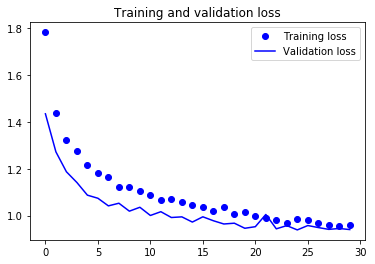

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs3 = range(len(acc3))

plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Save the Model
model3.save('food_model_3(VGG19_frozen).h5')

### VGG19 unfrozen

In [0]:
##### Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base4 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))


#unfreezing layers 
conv_base4.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True  
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model4 = models.Sequential()
model4.add(conv_base4) #ResNet50 pre-train
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))


conv_base4.summary()
model4.summary()

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history4 = model4.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs4 = range(len(acc4))

plt.plot(epochs4, acc4, 'bo', label='Training acc')
plt.plot(epochs4, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs4, loss4, 'bo', label='Training loss')
plt.plot(epochs4, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Save the Model
model4.save('food_model_4(VGG19_unfrozen).h5')

### BaseModel 1

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))



model5.summary()



model5.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history5 = model5.fit_generator(
      train_generator,
      steps_per_epoch=300, # batch: 25 * 300 = 7500 training images
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80) # 25 * 80 = 2000 validation images


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (25, 150, 150, 3)
labels batch shape: (25, 10)
Epoch 1/30
300/300 [==============================] - 311s 1s/step - loss: 2.0625 - acc: 0.2536 - val_loss: 1.8369 - val_acc: 0.3475
Epoch 2/30
300/300 [==============================] - 288s 961ms/step - loss: 1.8322 - acc: 0.3528 - val_loss: 1.6775 - val_acc: 0.4225
Epoch 3/30
300/300 [==============================] - 299s 996ms/step - loss: 1.7315 - acc: 0.3992 - val_loss: 1.6657 - val_acc: 0.4345
Epoch 4/30
300/300 [==============================] - 296s 986ms/step - loss: 1.6698 - acc: 0.4169 - val_loss: 1.5574 - val_acc: 0.4635
Epoch 5/30
300/300 [==============================] - 291s 971ms/step - loss: 1.6051 - acc: 0.4313 - val_loss: 1.4584 - val_acc: 0.4885
Epoch 6/30
300/300 [==============================] - 290s 968ms/step - loss: 1.5500 - acc: 0.4575 - val_loss: 1.4434 - val_acc: 0.4970
Epoch 7/30
300/300 [================

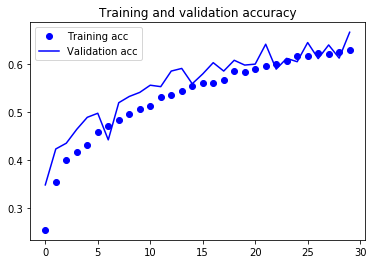

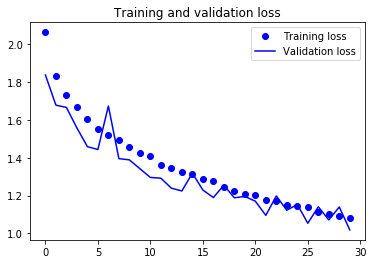

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs5 = range(len(acc5))

plt.plot(epochs5, acc5, 'bo', label='Training acc')
plt.plot(epochs5, val_acc5, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs5, loss5, 'bo', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Save the Model
model5.save('food_model_5(BaseModel).h5')

### BaseModel + 'Adam'

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model6 = models.Sequential()
model6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dense(10, activation='softmax'))



model6.summary()



model6.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history6 = model6.fit_generator(
      train_generator,
      steps_per_epoch=300, # batch: 25 * 300 = 7500 training images
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80) # 25 * 80 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (25, 150, 150, 3)
labels batch shape: (25, 10)
Epoch 1/30
300/300 [==============================] - 297s 990ms/step - loss: 2.0163 - acc: 0.2737 - val_loss: 1.8192 - val_acc: 0.3740
Epoch 2/30
300/300 [==============================] - 291s 969ms/step - loss: 1.7337 - acc: 0.3855 - val_loss: 1.5795 - val_acc: 0.4255
Epoch 3/30
300/300 [==============================] - 292s 972ms/step - loss: 1.5544 - acc: 0.4540 - val_loss: 1.4083 - val_acc: 0.5165
Epoch 4/30
300/300 [==============================] - 290s 968ms/step - loss: 1.4705 - acc: 0.4861 - val_loss: 1.6168 - val_acc: 0.4655
Epoch 5/30
300/300 [==============================] - 292s 973ms/step - loss: 1.3838 - acc: 0.5237 - val_loss: 1.2069 - val_acc: 0.5955
Epoch 6/30
300/300 [==============================] - 292s 973ms/step - loss: 1.3235 - acc: 0.5421 - val_loss: 1.1848 - val_acc: 0.5980
Epoch 7/30
300/300 [=============

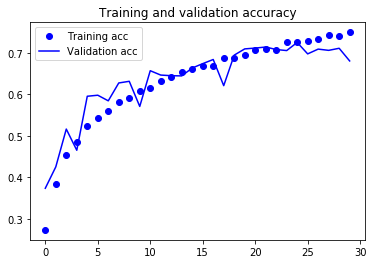

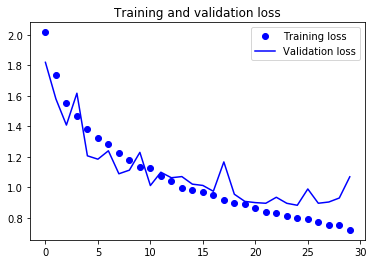

Found 500 images belonging to 10 classes.
test acc: 0.686


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc6 = history6.history['acc']
val_acc6 = history6.history['val_acc']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs6 = range(len(acc6))

plt.plot(epochs6, acc6, 'bo', label='Training acc')
plt.plot(epochs6, val_acc6, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs6, loss6, 'bo', label='Training loss')
plt.plot(epochs6, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model6.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model6.save('food_model_6(BaseModel+Adam).h5')

### BaseModel2

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model7 = models.Sequential()
model7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Dropout(0.25))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Dropout(0.25))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Dropout(0.25))
model7.add(layers.Flatten())
model7.add(layers.Dense(512, activation='relu'))
model7.add(layers.Dense(10, activation='softmax'))



model7.summary()



model7.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 35, 35, 128)       0         
___________________________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history7 = model7.fit_generator(
      train_generator,
      steps_per_epoch=300, # batch: 20 * 100 = 2000 training images
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80) # 20 * 50 = 1000 = 1000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (25, 150, 150, 3)
labels batch shape: (25, 10)
Epoch 1/30
300/300 [==============================] - 765s 3s/step - loss: 2.1529 - acc: 0.2087 - val_loss: 1.9272 - val_acc: 0.3610
Epoch 2/30
300/300 [==============================] - 768s 3s/step - loss: 1.8717 - acc: 0.3431 - val_loss: 1.8780 - val_acc: 0.3295
Epoch 3/30
300/300 [==============================] - 755s 3s/step - loss: 1.7342 - acc: 0.3909 - val_loss: 1.6805 - val_acc: 0.4165
Epoch 4/30
300/300 [==============================] - 762s 3s/step - loss: 1.6638 - acc: 0.4273 - val_loss: 1.5555 - val_acc: 0.4720
Epoch 5/30
300/300 [==============================] - 739s 2s/step - loss: 1.6141 - acc: 0.4388 - val_loss: 1.5468 - val_acc: 0.4625
Epoch 6/30
300/300 [==============================] - 741s 2s/step - loss: 1.5645 - acc: 0.4556 - val_loss: 1.4510 - val_acc: 0.5030
Epoch 7/30
300/300 [==============================]

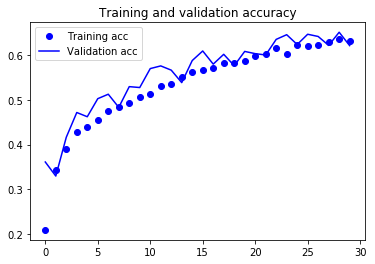

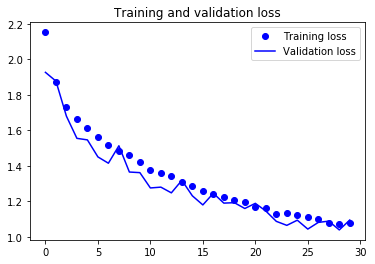

Found 500 images belonging to 10 classes.
test acc: 0.61


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc7 = history7.history['acc']
val_acc7 = history7.history['val_acc']
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']

epochs7 = range(len(acc7))

plt.plot(epochs7, acc7, 'bo', label='Training acc')
plt.plot(epochs7, val_acc7, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs7, loss7, 'bo', label='Training loss')
plt.plot(epochs7, val_loss7, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model7.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model7.save('food_model_7(BaseModel2).h5')

### BaseModel + Adam + >Epoch + Batch=10

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model8 = models.Sequential()
model8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dense(512, activation='relu'))
model8.add(layers.Dense(10, activation='softmax'))



model8.summary()



model8.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 128)       0         
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history8 = model8.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/50
750/750 [==============================] - 801s 1s/step - loss: 2.1705 - acc: 0.1927 - val_loss: 2.0671 - val_acc: 0.2060
Epoch 2/50
750/750 [==============================] - 796s 1s/step - loss: 1.8914 - acc: 0.3253 - val_loss: 1.7345 - val_acc: 0.3735
Epoch 3/50
750/750 [==============================] - 790s 1s/step - loss: 1.7421 - acc: 0.3851 - val_loss: 1.5135 - val_acc: 0.4870
Epoch 4/50
750/750 [==============================] - 787s 1s/step - loss: 1.6465 - acc: 0.4189 - val_loss: 1.4295 - val_acc: 0.5085
Epoch 5/50
750/750 [==============================] - 797s 1s/step - loss: 1.5560 - acc: 0.4547 - val_loss: 1.4475 - val_acc: 0.5045
Epoch 6/50
750/750 [==============================] - 792s 1s/step - loss: 1.5148 - acc: 0.4760 - val_loss: 1.3818 - val_acc: 0.5285
Epoch 7/50
750/750 [==============================]

750/750 [==============================] - 797s 1s/step - loss: 0.8945 - acc: 0.6931 - val_loss: 0.9065 - val_acc: 0.7090
Epoch 38/50
750/750 [==============================] - 789s 1s/step - loss: 0.8702 - acc: 0.7024 - val_loss: 0.9009 - val_acc: 0.7045
Epoch 39/50
750/750 [==============================] - 793s 1s/step - loss: 0.8798 - acc: 0.6988 - val_loss: 0.9170 - val_acc: 0.7015
Epoch 40/50
750/750 [==============================] - 791s 1s/step - loss: 0.8843 - acc: 0.7047 - val_loss: 0.8690 - val_acc: 0.7320
Epoch 41/50
750/750 [==============================] - 790s 1s/step - loss: 0.8531 - acc: 0.7092 - val_loss: 1.0118 - val_acc: 0.6880
Epoch 42/50
750/750 [==============================] - 791s 1s/step - loss: 0.8536 - acc: 0.7108 - val_loss: 0.9335 - val_acc: 0.7145
Epoch 43/50
750/750 [==============================] - 805s 1s/step - loss: 0.8644 - acc: 0.7091 - val_loss: 0.9509 - val_acc: 0.6915
Epoch 44/50
750/750 [==============================] - 810s 1s/step - loss

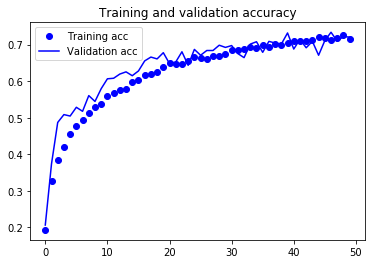

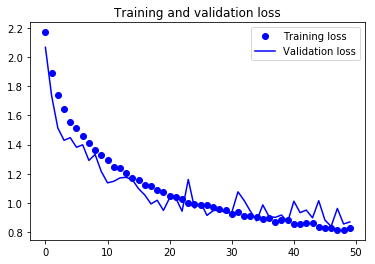

Found 500 images belonging to 10 classes.
test acc: 0.734


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc8 = history8.history['acc']
val_acc8 = history8.history['val_acc']
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']

epochs8 = range(len(acc8))

plt.plot(epochs8, acc8, 'bo', label='Training acc')
plt.plot(epochs8, val_acc8, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs8, loss8, 'bo', label='Training loss')
plt.plot(epochs8, val_loss8, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model8.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model8.save('food_model_6(BaseModel2+Adam_v2).h5')

### Model8 v2 

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model9 = models.Sequential()
model9.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model9.add(layers.Conv2D(32, (3, 3), activation='relu'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Flatten())
model9.add(layers.Dense(12, activation='relu'))
model9.add(layers.Dense(10, activation='softmax'))



model9.summary()



model9.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 33, 33, 64)        36928     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 64)        0         
__________

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/50
750/750 [==============================] - 373s 498ms/step - loss: 2.1947 - acc: 0.1841 - val_loss: 1.9654 - val_acc: 0.2870
Epoch 2/50
750/750 [==============================] - 366s 488ms/step - loss: 1.9993 - acc: 0.2664 - val_loss: 1.9152 - val_acc: 0.3135
Epoch 3/50
750/750 [==============================] - 384s 511ms/step - loss: 1.9239 - acc: 0.3048 - val_loss: 1.7993 - val_acc: 0.3545
Epoch 4/50
750/750 [==============================] - 364s 486ms/step - loss: 1.8103 - acc: 0.3504 - val_loss: 1.6554 - val_acc: 0.4320
Epoch 5/50
750/750 [==============================] - 361s 482ms/step - loss: 1.6945 - acc: 0.3999 - val_loss: 1.4825 - val_acc: 0.4985
Epoch 6/50
750/750 [==============================] - 356s 475ms/step - loss: 1.6118 - acc: 0.4352 - val_loss: 1.4280 - val_acc: 0.4980
Epoch 7/50
750/750 [=============

Epoch 36/50
750/750 [==============================] - 354s 472ms/step - loss: 0.9927 - acc: 0.6651 - val_loss: 0.9682 - val_acc: 0.6725
Epoch 37/50
750/750 [==============================] - 355s 473ms/step - loss: 0.9877 - acc: 0.6723 - val_loss: 0.8979 - val_acc: 0.7015
Epoch 38/50
750/750 [==============================] - 354s 472ms/step - loss: 0.9621 - acc: 0.6711 - val_loss: 0.9807 - val_acc: 0.6770
Epoch 39/50
750/750 [==============================] - 353s 471ms/step - loss: 0.9663 - acc: 0.6780 - val_loss: 0.9960 - val_acc: 0.6720
Epoch 40/50
750/750 [==============================] - 357s 476ms/step - loss: 0.9636 - acc: 0.6760 - val_loss: 1.0548 - val_acc: 0.6500
Epoch 41/50
750/750 [==============================] - 358s 477ms/step - loss: 0.9467 - acc: 0.6841 - val_loss: 0.8682 - val_acc: 0.7065
Epoch 42/50
750/750 [==============================] - 355s 473ms/step - loss: 0.9523 - acc: 0.6779 - val_loss: 0.9092 - val_acc: 0.6960
Epoch 43/50
750/750 [====================

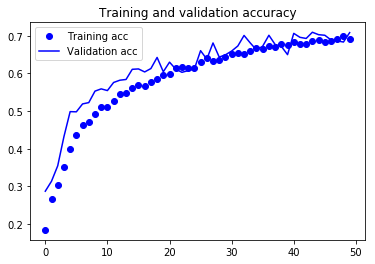

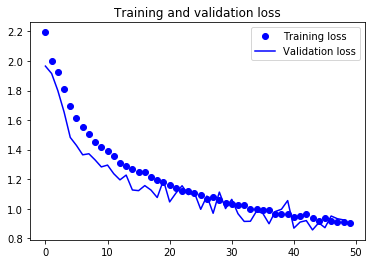

Found 500 images belonging to 10 classes.
test acc: 0.714


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc9 = history9.history['acc']
val_acc9 = history9.history['val_acc']
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']

epochs9 = range(len(acc9))

plt.plot(epochs9, acc9, 'bo', label='Training acc')
plt.plot(epochs9, val_acc9, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs9, loss9, 'bo', label='Training loss')
plt.plot(epochs9, val_loss9, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model9.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model9.save('food_model_6(BaseModel2+Adam_v3).h5')

### Remodeling of BaseModel2+Adam_v3 due to typo

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model10 = models.Sequential()
model10.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model10.add(layers.Conv2D(32, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(128, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))



model10.summary()



model10.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 33, 33, 64)        36928     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 16, 16, 64)        0         
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history10 = model10.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 375s 500ms/step - loss: 2.0673 - acc: 0.2425 - val_loss: 1.8063 - val_acc: 0.3770
Epoch 2/120
750/750 [==============================] - 360s 480ms/step - loss: 1.8280 - acc: 0.3484 - val_loss: 1.5943 - val_acc: 0.4440
Epoch 3/120
750/750 [==============================] - 359s 479ms/step - loss: 1.6531 - acc: 0.4207 - val_loss: 1.4044 - val_acc: 0.5120
Epoch 4/120
750/750 [==============================] - 356s 474ms/step - loss: 1.5253 - acc: 0.4651 - val_loss: 1.3891 - val_acc: 0.5260
Epoch 5/120
750/750 [==============================] - 356s 475ms/step - loss: 1.4509 - acc: 0.4927 - val_loss: 1.3570 - val_acc: 0.5385
Epoch 6/120
750/750 [==============================] - 354s 472ms/step - loss: 1.4031 - acc: 0.5211 - val_loss: 1.2947 - val_acc: 0.5580
Epoch 7/120
750/750 [======

Epoch 36/120
750/750 [==============================] - 354s 472ms/step - loss: 0.8898 - acc: 0.6969 - val_loss: 0.8972 - val_acc: 0.7045
Epoch 37/120
750/750 [==============================] - 353s 470ms/step - loss: 0.8846 - acc: 0.6961 - val_loss: 0.9294 - val_acc: 0.7055
Epoch 38/120
750/750 [==============================] - 354s 473ms/step - loss: 0.8785 - acc: 0.7051 - val_loss: 0.8871 - val_acc: 0.7115
Epoch 39/120
750/750 [==============================] - 355s 474ms/step - loss: 0.8707 - acc: 0.7105 - val_loss: 0.8597 - val_acc: 0.7100
Epoch 40/120
750/750 [==============================] - 355s 474ms/step - loss: 0.8738 - acc: 0.7025 - val_loss: 0.8603 - val_acc: 0.7145
Epoch 41/120
750/750 [==============================] - 354s 472ms/step - loss: 0.8580 - acc: 0.7089 - val_loss: 0.9595 - val_acc: 0.7000
Epoch 42/120
750/750 [==============================] - 353s 471ms/step - loss: 0.8639 - acc: 0.7119 - val_loss: 0.8330 - val_acc: 0.7275
Epoch 43/120
750/750 [============

Epoch 71/120
750/750 [==============================] - 353s 471ms/step - loss: 0.7445 - acc: 0.7448 - val_loss: 0.8909 - val_acc: 0.7355
Epoch 72/120
750/750 [==============================] - 353s 471ms/step - loss: 0.7683 - acc: 0.7384 - val_loss: 0.8308 - val_acc: 0.7375
Epoch 73/120
750/750 [==============================] - 355s 473ms/step - loss: 0.7428 - acc: 0.7493 - val_loss: 0.8425 - val_acc: 0.7415
Epoch 74/120
750/750 [==============================] - 356s 475ms/step - loss: 0.7434 - acc: 0.7452 - val_loss: 0.8765 - val_acc: 0.7185
Epoch 75/120
750/750 [==============================] - 355s 473ms/step - loss: 0.7314 - acc: 0.7555 - val_loss: 0.8519 - val_acc: 0.7240
Epoch 76/120
750/750 [==============================] - 352s 469ms/step - loss: 0.7289 - acc: 0.7579 - val_loss: 0.8664 - val_acc: 0.7345
Epoch 77/120
750/750 [==============================] - 353s 471ms/step - loss: 0.7314 - acc: 0.7552 - val_loss: 0.8885 - val_acc: 0.7295
Epoch 78/120
750/750 [============

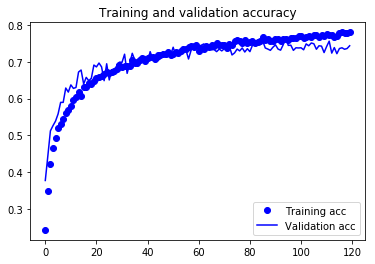

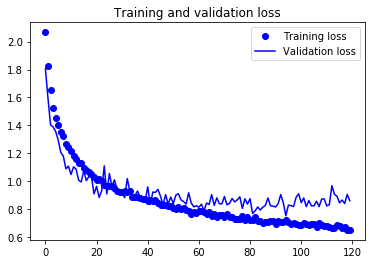

Found 500 images belonging to 10 classes.
test acc: 0.74


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

epochs10 = range(len(acc10))

plt.plot(epochs10, acc10, 'bo', label='Training acc')
plt.plot(epochs10, val_acc10, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model10.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model10.save('food_model_6(BaseModel2+Adam_v4).h5')

### BaseModel (finalise v1) Model8

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model11 = models.Sequential()
model11.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(128, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(128, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Flatten())
model11.add(layers.Dense(512, activation='relu'))
model11.add(layers.Dense(10, activation='softmax'))



model11.summary()



model11.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history11 = model11.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 244s 325ms/step - loss: 2.0704 - acc: 0.2385 - val_loss: 1.9311 - val_acc: 0.3030
Epoch 2/120
750/750 [==============================] - 245s 327ms/step - loss: 1.8982 - acc: 0.3131 - val_loss: 1.6766 - val_acc: 0.4170
Epoch 3/120
750/750 [==============================] - 246s 328ms/step - loss: 1.7263 - acc: 0.3887 - val_loss: 1.6052 - val_acc: 0.4275
Epoch 4/120
750/750 [==============================] - 249s 333ms/step - loss: 1.5913 - acc: 0.4368 - val_loss: 1.3773 - val_acc: 0.5125
Epoch 5/120
750/750 [==============================] - 244s 326ms/step - loss: 1.4726 - acc: 0.4844 - val_loss: 1.2708 - val_acc: 0.5605
Epoch 6/120
750/750 [==============================] - 245s 327ms/step - loss: 1.3911 - acc: 0.5115 - val_loss: 1.2167 - val_acc: 0.5870
Epoch 7/120
750/750 [======

Epoch 37/120
750/750 [==============================] - 245s 326ms/step - loss: 0.8275 - acc: 0.7183 - val_loss: 0.9658 - val_acc: 0.6855
Epoch 38/120
750/750 [==============================] - 243s 324ms/step - loss: 0.8377 - acc: 0.7157 - val_loss: 0.9058 - val_acc: 0.7105
Epoch 39/120
750/750 [==============================] - 244s 325ms/step - loss: 0.8446 - acc: 0.7084 - val_loss: 0.9623 - val_acc: 0.7030
Epoch 40/120
750/750 [==============================] - 243s 324ms/step - loss: 0.8409 - acc: 0.7137 - val_loss: 0.9677 - val_acc: 0.7035
Epoch 41/120
750/750 [==============================] - 245s 326ms/step - loss: 0.8328 - acc: 0.7171 - val_loss: 0.9309 - val_acc: 0.7050
Epoch 42/120
750/750 [==============================] - 243s 325ms/step - loss: 0.8135 - acc: 0.7223 - val_loss: 1.0190 - val_acc: 0.6805
Epoch 43/120
750/750 [==============================] - 243s 324ms/step - loss: 0.8090 - acc: 0.7195 - val_loss: 0.9067 - val_acc: 0.7040
Epoch 44/120
750/750 [============

750/750 [==============================] - 243s 324ms/step - loss: 0.6828 - acc: 0.7736 - val_loss: 0.8987 - val_acc: 0.7250
Epoch 110/120
750/750 [==============================] - 243s 324ms/step - loss: 0.6726 - acc: 0.7709 - val_loss: 0.9224 - val_acc: 0.7415
Epoch 111/120
750/750 [==============================] - 254s 339ms/step - loss: 0.6611 - acc: 0.7787 - val_loss: 0.8569 - val_acc: 0.7395
Epoch 112/120
750/750 [==============================] - 252s 336ms/step - loss: 0.6682 - acc: 0.7797 - val_loss: 1.0160 - val_acc: 0.7200
Epoch 113/120
750/750 [==============================] - 243s 325ms/step - loss: 0.6831 - acc: 0.7721 - val_loss: 0.9958 - val_acc: 0.7175
Epoch 114/120
750/750 [==============================] - 243s 324ms/step - loss: 0.6683 - acc: 0.7785 - val_loss: 0.9707 - val_acc: 0.7155
Epoch 115/120
750/750 [==============================] - 244s 325ms/step - loss: 0.6876 - acc: 0.7679 - val_loss: 0.9096 - val_acc: 0.7315
Epoch 116/120
750/750 [==================

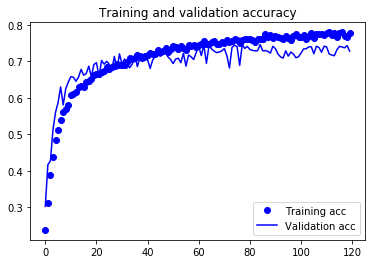

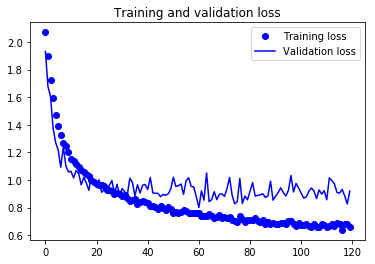

Found 500 images belonging to 10 classes.
test acc: 0.704


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc11 = history11.history['acc']
val_acc11 = history11.history['val_acc']
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

epochs11 = range(len(acc11))

plt.plot(epochs11, acc11, 'bo', label='Training acc')
plt.plot(epochs11, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs11, loss11, 'bo', label='Training loss')
plt.plot(epochs11, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model11.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model11.save('food_model_8(Final_BaseModel_v1).h5')

### BaseModel (finalise v2) - testing (-nodes+lr)

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model12 = models.Sequential()
model12.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(32, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Flatten())
model12.add(layers.Dense(128, activation='relu'))
model12.add(layers.Dense(10, activation='softmax'))



model12.summary()



model12.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 15, 15, 64)        36928     
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history12 = model12.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 156s 208ms/step - loss: 2.1528 - acc: 0.2091 - val_loss: 1.9288 - val_acc: 0.3460
Epoch 2/120
750/750 [==============================] - 153s 204ms/step - loss: 1.8348 - acc: 0.3613 - val_loss: 1.8265 - val_acc: 0.3830
Epoch 3/120
750/750 [==============================] - 154s 205ms/step - loss: 1.7199 - acc: 0.3952 - val_loss: 1.5907 - val_acc: 0.4570
Epoch 4/120
750/750 [==============================] - 155s 206ms/step - loss: 1.6510 - acc: 0.4273 - val_loss: 1.5566 - val_acc: 0.4565
Epoch 5/120
750/750 [==============================] - 155s 207ms/step - loss: 1.6067 - acc: 0.4433 - val_loss: 1.5478 - val_acc: 0.4660
Epoch 6/120
750/750 [==============================] - 155s 206ms/step - loss: 1.5753 - acc: 0.4537 - val_loss: 1.6314 - val_acc: 0.4495
Epoch 7/120
750/750 [======

Epoch 37/120
750/750 [==============================] - 154s 205ms/step - loss: 1.1047 - acc: 0.6231 - val_loss: 1.1313 - val_acc: 0.6210
Epoch 38/120
750/750 [==============================] - 154s 206ms/step - loss: 1.0908 - acc: 0.6263 - val_loss: 1.0766 - val_acc: 0.6375
Epoch 39/120
750/750 [==============================] - 154s 205ms/step - loss: 1.0885 - acc: 0.6369 - val_loss: 1.1483 - val_acc: 0.6205
Epoch 40/120
750/750 [==============================] - 155s 206ms/step - loss: 1.0721 - acc: 0.6327 - val_loss: 1.1063 - val_acc: 0.6245
Epoch 41/120
750/750 [==============================] - 156s 208ms/step - loss: 1.0598 - acc: 0.6311 - val_loss: 1.1305 - val_acc: 0.6265
Epoch 42/120
750/750 [==============================] - 154s 206ms/step - loss: 1.0558 - acc: 0.6413 - val_loss: 1.0670 - val_acc: 0.6490
Epoch 43/120
750/750 [==============================] - 155s 207ms/step - loss: 1.0443 - acc: 0.6376 - val_loss: 1.0887 - val_acc: 0.6265
Epoch 44/120
750/750 [============

750/750 [==============================] - 154s 205ms/step - loss: 0.7476 - acc: 0.7432 - val_loss: 0.9622 - val_acc: 0.6880
Epoch 110/120
750/750 [==============================] - 154s 205ms/step - loss: 0.7324 - acc: 0.7485 - val_loss: 0.9130 - val_acc: 0.7070
Epoch 111/120
750/750 [==============================] - 154s 205ms/step - loss: 0.7339 - acc: 0.7472 - val_loss: 1.0103 - val_acc: 0.6880
Epoch 112/120
750/750 [==============================] - 157s 209ms/step - loss: 0.7357 - acc: 0.7451 - val_loss: 0.9829 - val_acc: 0.6925
Epoch 113/120
750/750 [==============================] - 155s 207ms/step - loss: 0.7356 - acc: 0.7536 - val_loss: 0.9278 - val_acc: 0.7100
Epoch 114/120
750/750 [==============================] - 153s 204ms/step - loss: 0.7364 - acc: 0.7457 - val_loss: 1.0831 - val_acc: 0.6640
Epoch 115/120
750/750 [==============================] - 154s 205ms/step - loss: 0.7197 - acc: 0.7519 - val_loss: 0.9900 - val_acc: 0.6860
Epoch 116/120
750/750 [==================

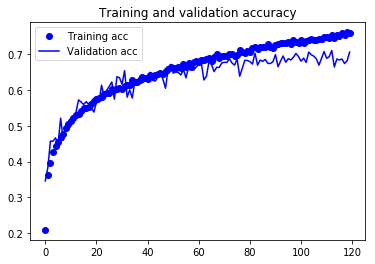

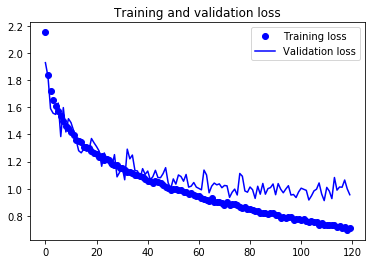

Found 500 images belonging to 10 classes.
test acc: 0.682


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs12 = range(len(acc12))

plt.plot(epochs12, acc12, 'bo', label='Training acc')
plt.plot(epochs12, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs12, loss12, 'bo', label='Training loss')
plt.plot(epochs12, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model12.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model12.save('food_model_8(Final_BaseModel_v2).h5')

### BaseModel (finalize v3) - testing (lr=1e-4)

In [0]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

img_size = 150

model13 = models.Sequential()
model13.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Conv2D(32, (3, 3), activation='relu'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Conv2D(64, (3, 3), activation='relu'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Conv2D(64, (3, 3), activation='relu'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Flatten())
model13.add(layers.Dense(128, activation='relu'))
model13.add(layers.Dense(10, activation='softmax'))



model13.summary()



model13.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 15, 15, 64)        36928     
__________

In [0]:
# Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
# All images will be rescaled by 1./255
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

#check 
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history13 = model13.fit_generator(
      train_generator,
      steps_per_epoch=750, # batch: 10 * 750 = 7500 training images
      epochs=120,
      validation_data=validation_generator,
      validation_steps=200) # 10 * 200 = 2000 validation images


  

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)
Epoch 1/120
750/750 [==============================] - 151s 202ms/step - loss: 2.1812 - acc: 0.1924 - val_loss: 2.0611 - val_acc: 0.2650
Epoch 2/120
750/750 [==============================] - 154s 205ms/step - loss: 1.9728 - acc: 0.2908 - val_loss: 1.8176 - val_acc: 0.3660
Epoch 3/120
750/750 [==============================] - 155s 207ms/step - loss: 1.8066 - acc: 0.3669 - val_loss: 1.6663 - val_acc: 0.4225
Epoch 4/120
750/750 [==============================] - 154s 206ms/step - loss: 1.7136 - acc: 0.3889 - val_loss: 1.5998 - val_acc: 0.4535
Epoch 5/120
750/750 [==============================] - 156s 207ms/step - loss: 1.6606 - acc: 0.4137 - val_loss: 1.7910 - val_acc: 0.4005
Epoch 6/120
750/750 [==============================] - 155s 207ms/step - loss: 1.6192 - acc: 0.4343 - val_loss: 1.7261 - val_acc: 0.4335
Epoch 7/120
750/750 [======

Epoch 37/120
750/750 [==============================] - 155s 207ms/step - loss: 1.1241 - acc: 0.6192 - val_loss: 1.2194 - val_acc: 0.5920
Epoch 38/120
750/750 [==============================] - 153s 204ms/step - loss: 1.1042 - acc: 0.6240 - val_loss: 1.1686 - val_acc: 0.6030
Epoch 39/120
750/750 [==============================] - 157s 209ms/step - loss: 1.1019 - acc: 0.6204 - val_loss: 1.0827 - val_acc: 0.6265
Epoch 40/120
750/750 [==============================] - 156s 208ms/step - loss: 1.0898 - acc: 0.6311 - val_loss: 1.1231 - val_acc: 0.6060
Epoch 41/120
750/750 [==============================] - 156s 208ms/step - loss: 1.0921 - acc: 0.6289 - val_loss: 1.0801 - val_acc: 0.6245
Epoch 42/120
750/750 [==============================] - 157s 209ms/step - loss: 1.0800 - acc: 0.6287 - val_loss: 1.0248 - val_acc: 0.6500
Epoch 43/120
750/750 [==============================] - 156s 208ms/step - loss: 1.0715 - acc: 0.6356 - val_loss: 1.1196 - val_acc: 0.6135
Epoch 44/120
750/750 [============

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores

import matplotlib.pyplot as plt
%matplotlib inline

acc13 = history13.history['acc']
val_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
val_loss13 = history13.history['val_loss']

epochs13 = range(len(acc13))

plt.plot(epochs13, acc13, 'bo', label='Training acc')
plt.plot(epochs13, val_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs13, loss13, 'bo', label='Training loss')
plt.plot(epochs13, val_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model13.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model13.save('food_model_8(Final_BaseModel_v3).h5')

### ResNet50 (frozen) + SGD 

In [0]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base14 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezeing (without fine tuning of layer freezing)
conv_base14.trainable = False

model14 = models.Sequential()
model14.add(conv_base14) #ResNet50 pre-train
model14.add(layers.Flatten())
model14.add(layers.Dense(256, activation='relu'))
model14.add(layers.Dense(10, activation='softmax'))


conv_base14.summary()
model14.summary()

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\OldManSteve\AppData\Roaming\Python\Python37\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model14.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history14 = model14.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
750/750 [==============================] - 859s 1s/step - loss: 2.8278 - acc: 0.1632 - val_loss: 2.6848 - val_acc: 0.1625
Epoch 2/30
750/750 [==============================] - 850s 1s/step - loss: 2.2389 - acc: 0.2784 - val_loss: 1.9792 - val_acc: 0.3550
Epoch 3/30
750/750 [==============================] - 849s 1s/step - loss: 1.9791 - acc: 0.3461 - val_loss: 1.7445 - val_acc: 0.4300
Epoch 4/30
750/750 [==============================] - 848s 1s/step - loss: 1.7860 - acc: 0.4036 - val_loss: 1.5994 - val_acc: 0.4780
Epoch 5/30
750/750 [==============================] - 848s 1s/step - loss: 1.6753 - acc: 0.4383 - val_loss: 1.5021 - val_acc: 0.5085
Epoch 6/30
750/750 [==============================] - 863s 1s/step - loss: 1.6078 - acc: 0.4660 - val_loss: 1.4218 - val_acc: 0.5290
Epoch 7/30
750/750 [==============================] - 847s 1s/step -

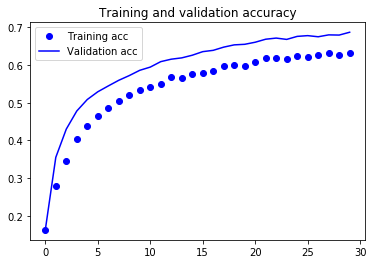

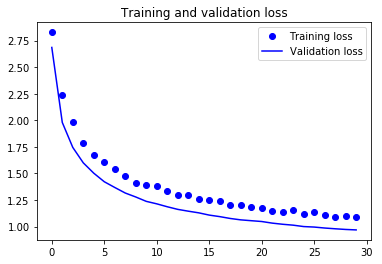

Found 500 images belonging to 10 classes.
test acc: 0.712


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc14 = history14.history['acc']
val_acc14 = history14.history['val_acc']
loss14 = history14.history['loss']
val_loss14 = history14.history['val_loss']

epochs14 = range(len(acc14))

plt.plot(epochs14, acc14, 'bo', label='Training acc')
plt.plot(epochs14, val_acc14, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs14, loss14, 'bo', label='Training loss')
plt.plot(epochs14, val_loss14, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model14.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model14.save('food_model_1(ResNet50_frozen+SGD).h5')

### ResNet50 (frozen) + SGD + >Epoch

In [0]:
# Build the Model
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#ResNet50 convbase
conv_base15 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#freezeing (without fine tuning of layer freezing)
conv_base15.trainable = False

model15 = models.Sequential()
model15.add(conv_base15) #ResNet50 pre-train
model15.add(layers.Flatten())
model15.add(layers.Dense(256, activation='relu'))
model15.add(layers.Dense(10, activation='softmax'))


conv_base15.summary()
model15.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model15.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=2e-5),
              metrics=['acc'])

history15 = model15.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=75,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/75
750/750 [==============================] - 854s 1s/step - loss: 2.8339 - acc: 0.1608 - val_loss: 2.4944 - val_acc: 0.1805
Epoch 2/75
750/750 [==============================] - 850s 1s/step - loss: 2.2254 - acc: 0.2792 - val_loss: 1.9776 - val_acc: 0.3540
Epoch 3/75
750/750 [==============================] - 846s 1s/step - loss: 1.9596 - acc: 0.3484 - val_loss: 1.7566 - val_acc: 0.4190
Epoch 4/75
750/750 [==============================] - 866s 1s/step - loss: 1.8154 - acc: 0.3955 - val_loss: 1.6114 - val_acc: 0.4590
Epoch 5/75
750/750 [==============================] - 877s 1s/step - loss: 1.6775 - acc: 0.4367 - val_loss: 1.5154 - val_acc: 0.4965
Epoch 6/75
750/750 [==============================] - 963s 1s/step - loss: 1.6105 - acc: 0.4633 - val_loss: 1.4282 - val_acc: 0.5265
Epoch 7/75
750/750 [==============================] - 967s 1s/step - loss: 1.5568 - acc: 0.4751 - val_loss: 1.3707 -

Epoch 38/75
750/750 [==============================] - 852s 1s/step - loss: 1.0235 - acc: 0.6552 - val_loss: 0.9438 - val_acc: 0.6960
Epoch 39/75
750/750 [==============================] - 851s 1s/step - loss: 1.0116 - acc: 0.6547 - val_loss: 0.9383 - val_acc: 0.6995
Epoch 40/75
750/750 [==============================] - 853s 1s/step - loss: 1.0073 - acc: 0.6593 - val_loss: 0.9356 - val_acc: 0.6970
Epoch 41/75
750/750 [==============================] - 860s 1s/step - loss: 1.0026 - acc: 0.6637 - val_loss: 0.9340 - val_acc: 0.7060
Epoch 42/75
750/750 [==============================] - 856s 1s/step - loss: 0.9951 - acc: 0.6693 - val_loss: 0.9281 - val_acc: 0.7035
Epoch 43/75
750/750 [==============================] - 854s 1s/step - loss: 1.0037 - acc: 0.6583 - val_loss: 0.9181 - val_acc: 0.7040
Epoch 44/75
750/750 [==============================] - 852s 1s/step - loss: 0.9850 - acc: 0.6688 - val_loss: 0.9172 - val_acc: 0.7020
Epoch 45/75
750/750 [==============================] - 857s 1s

750/750 [==============================] - 864s 1s/step - loss: 0.8838 - acc: 0.7003 - val_loss: 0.8415 - val_acc: 0.7305


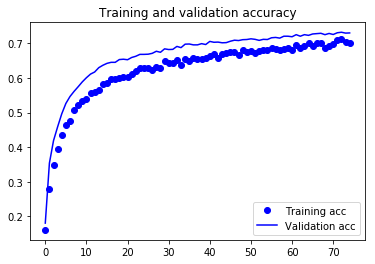

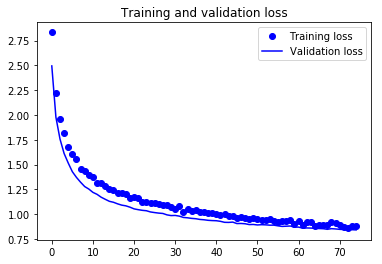

Found 500 images belonging to 10 classes.
test acc: 0.738


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc15 = history15.history['acc']
val_acc15 = history15.history['val_acc']
loss15 = history15.history['loss']
val_loss15 = history15.history['val_loss']

epochs15 = range(len(acc15))

plt.plot(epochs15, acc15, 'bo', label='Training acc')
plt.plot(epochs15, val_acc15, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs15, loss15, 'bo', label='Training loss')
plt.plot(epochs15, val_loss15, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model15.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model15.save('food_model_1(ResNet50_frozen+SGD)v2.h5')

In [0]:
history15 = model15.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/15
750/750 [==============================] - 861s 1s/step - loss: 0.8587 - acc: 0.7099 - val_loss: 0.8364 - val_acc: 0.7300
Epoch 2/15
750/750 [==============================] - 862s 1s/step - loss: 0.8552 - acc: 0.7123 - val_loss: 0.8458 - val_acc: 0.7270
Epoch 3/15
750/750 [==============================] - 862s 1s/step - loss: 0.8749 - acc: 0.7032 - val_loss: 0.8374 - val_acc: 0.7300
Epoch 4/15
750/750 [==============================] - 865s 1s/step - loss: 0.8747 - acc: 0.7040 - val_loss: 0.8404 - val_acc: 0.7340
Epoch 5/15
750/750 [==============================] - 866s 1s/step - loss: 0.8711 - acc: 0.7028 - val_loss: 0.8365 - val_acc: 0.7325
Epoch 6/15
750/750 [==============================] - 865s 1s/step - loss: 0.8665 - acc: 0.7071 - val_loss: 0.8370 - val_acc: 0.7345
Epoch 7/15
750/750 [==============================] - 867s 1s/step - loss: 0.8475 - acc: 0.7124 - val_loss: 0.8352 - val_acc: 0.7350
Epoch 8/15
750/750 [==============================] - 866s 1s/step - 

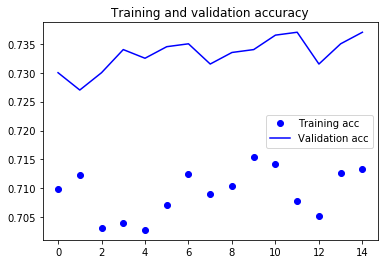

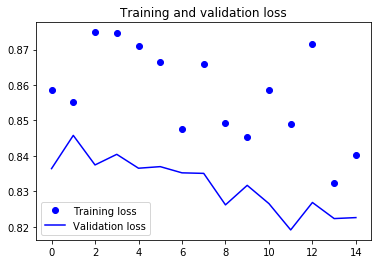

Found 500 images belonging to 10 classes.
test acc: 0.756


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc15 = history15.history['acc']
val_acc15 = history15.history['val_acc']
loss15 = history15.history['loss']
val_loss15 = history15.history['val_loss']

epochs15 = range(len(acc15))

plt.plot(epochs15, acc15, 'bo', label='Training acc')
plt.plot(epochs15, val_acc15, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs15, loss15, 'bo', label='Training loss')
plt.plot(epochs15, val_loss15, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model15.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model15.save('food_model_1(ResNet50_frozen+SGD)v2_1.h5')

In [0]:
history15 = model15.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/15
750/750 [==============================] - 861s 1s/step - loss: 0.8259 - acc: 0.7176 - val_loss: 0.8165 - val_acc: 0.7340
Epoch 2/15
750/750 [==============================] - 864s 1s/step - loss: 0.8413 - acc: 0.7193 - val_loss: 0.8176 - val_acc: 0.7370
Epoch 3/15
750/750 [==============================] - 863s 1s/step - loss: 0.8316 - acc: 0.7160 - val_loss: 0.8150 - val_acc: 0.7405
Epoch 4/15
750/750 [==============================] - 867s 1s/step - loss: 0.7963 - acc: 0.7329 - val_loss: 0.8173 - val_acc: 0.7365
Epoch 5/15
750/750 [==============================] - 864s 1s/step - loss: 0.8253 - acc: 0.7232 - val_loss: 0.8165 - val_acc: 0.7360
Epoch 6/15
750/750 [==============================] - 866s 1s/step - loss: 0.8127 - acc: 0.7233 - val_loss: 0.8129 - val_acc: 0.7380
Epoch 7/15
750/750 [==============================] - 867s 1s/step - loss: 0.8264 - acc: 0.7229 - val_loss: 0.8185 - val_acc: 0.7375
Epoch 8/15
750/750 [==============================] - 874s 1s/step - 

In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc15 = history15.history['acc']
val_acc15 = history15.history['val_acc']
loss15 = history15.history['loss']
val_loss15 = history15.history['val_loss']

epochs15 = range(len(acc15))

plt.plot(epochs15, acc15, 'bo', label='Training acc')
plt.plot(epochs15, val_acc15, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs15, loss15, 'bo', label='Training loss')
plt.plot(epochs15, val_loss15, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model15.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model
model15.save('food_model_1(ResNet50_frozen+SGD)v2_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [0]:
# Model #1
model.load_weights('food_model_1.h5')




In [0]:
# Model #2
model.load_weights('food_model_2.h5')




In [0]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [0]:
# Load the model
model.load_weights('food_model_best.h5')

In [0]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [0]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [0]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)